<a href="https://colab.research.google.com/github/Sanjay1802/Machine-Learning/blob/main/Customer_Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/customer_churn (1) (1).csv')

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
print(data.iloc[:, :5].to_string())

      customerID  gender  SeniorCitizen Partner Dependents
0     7590-VHVEG  Female              0     Yes         No
1     5575-GNVDE    Male              0      No         No
2     3668-QPYBK    Male              0      No         No
3     7795-CFOCW    Male              0      No         No
4     9237-HQITU  Female              0      No         No
5     9305-CDSKC  Female              0      No         No
6     1452-KIOVK    Male              0      No        Yes
7     6713-OKOMC  Female              0      No         No
8     7892-POOKP  Female              0     Yes         No
9     6388-TABGU    Male              0      No        Yes
10    9763-GRSKD    Male              0     Yes        Yes
11    7469-LKBCI    Male              0      No         No
12    8091-TTVAX    Male              0     Yes         No
13    0280-XJGEX    Male              0      No         No
14    5129-JLPIS    Male              0      No         No
15    3655-SNQYZ  Female              0     Yes        Y

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
#EDA

In [ ]:
customer_5 = data.iloc[:, 4]
print("5th Column (customer_5):")
print(customer_5.head())

5th Column (customer_5):
0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object


In [ ]:
customer_15 = data.iloc[:, 14]
print("15th Column (customer_15):")
print(customer_15.head())

15th Column (customer_15):
0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object


In [ ]:
senior_male_electronic = data[(data['gender'] == 'Male') & (data['SeniorCitizen'] == 1) & (data['PaymentMethod'] == 'Electronic check')]
print(senior_male_electronic.head())

    customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
20  8779-QRDMV   Male              1      No         No       1           No   
55  1658-BYGOY   Male              1      No         No      18          Yes   
57  5067-XJQFU   Male              1     Yes        Yes      66          Yes   
78  0191-ZHSKZ   Male              1      No         No      30          Yes   
91  2424-WVHPL   Male              1      No         No       1          Yes   

       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
20  No phone service             DSL             No  ...              Yes   
55               Yes     Fiber optic             No  ...               No   
57               Yes     Fiber optic             No  ...              Yes   
78                No             DSL            Yes  ...               No   
91                No     Fiber optic             No  ...               No   

   TechSupport StreamingTV StreamingMovies        Contra

In [ ]:
customer_total_tenure = data[(data['tenure'] > 70) | (data['MonthlyCharges'] > 100)]
print(customer_total_tenure.head())

    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
8   7892-POOKP  Female              0     Yes         No      28          Yes   
12  8091-TTVAX    Male              0     Yes         No      58          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   
14  5129-JLPIS    Male              0      No         No      25          Yes   
15  3655-SNQYZ  Female              0     Yes        Yes      69          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
8            Yes     Fiber optic             No  ...              Yes   
12           Yes     Fiber optic             No  ...              Yes   
13           Yes     Fiber optic             No  ...              Yes   
14            No     Fiber optic            Yes  ...              Yes   
15           Yes     Fiber optic            Yes  ...              Yes   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBillin

In [ ]:
two_mail_yes = data[(data['Contract'] == 'Two year') & (data['PaymentMethod'] == 'Mailed check') & (data['Churn'] == 'Yes')]
print(two_mail_yes.head())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
268   6323-AYBRX    Male              0      No         No      59   
5947  7951-QKZPL  Female              0     Yes        Yes      33   
6680  9412-ARGBX  Female              0      No        Yes      48   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
268           Yes            No              No  No internet service  ...   
5947          Yes           Yes              No  No internet service  ...   
6680          Yes            No     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
268   No internet service  No internet service  No internet service   
5947  No internet service  No internet service  No internet service   
6680                  Yes                  Yes                  Yes   

          StreamingMovies  Contract PaperlessBilling PaymentMethod  \
268   No internet service  Two year               No  M

In [ ]:
customer_333 = data.sample(n=333)
print(customer_333.head())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1264  6244-BESBM    Male              0     Yes        Yes      69   
6200  7328-ZJAJO  Female              0     Yes        Yes      59   
2056  4138-NAXED    Male              0      No         No      51   
6289  9053-JZFKV    Male              0      No         No      67   
1411  2692-BUCFV    Male              1      No         No      29   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
1264          Yes            No     Fiber optic                   No  ...   
6200          Yes            No              No  No internet service  ...   
2056          Yes           Yes     Fiber optic                   No  ...   
6289          Yes           Yes     Fiber optic                  Yes  ...   
1411          Yes            No     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
1264                   No                  Ye

In [ ]:
churn_counts = data['Churn'].value_counts()
print(churn_counts)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
#Data Visualization

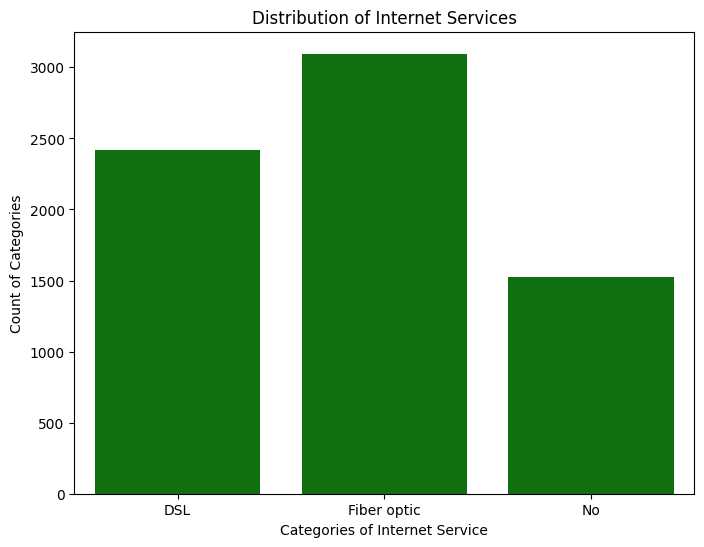

In [ ]:


plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='InternetService', color='green', legend=False)
plt.title('Distribution of Internet Services')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.show()

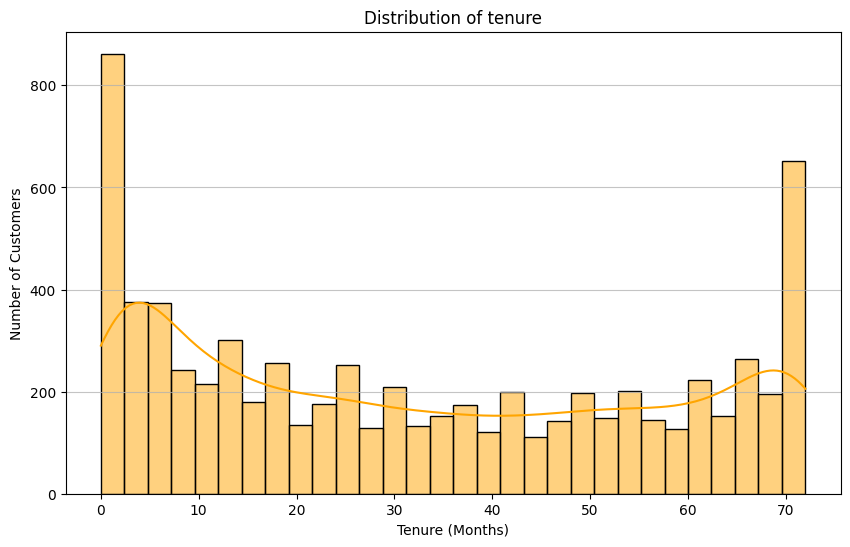

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='tenure', bins=30, kde=True, color='orange')
plt.title('Distribution of tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

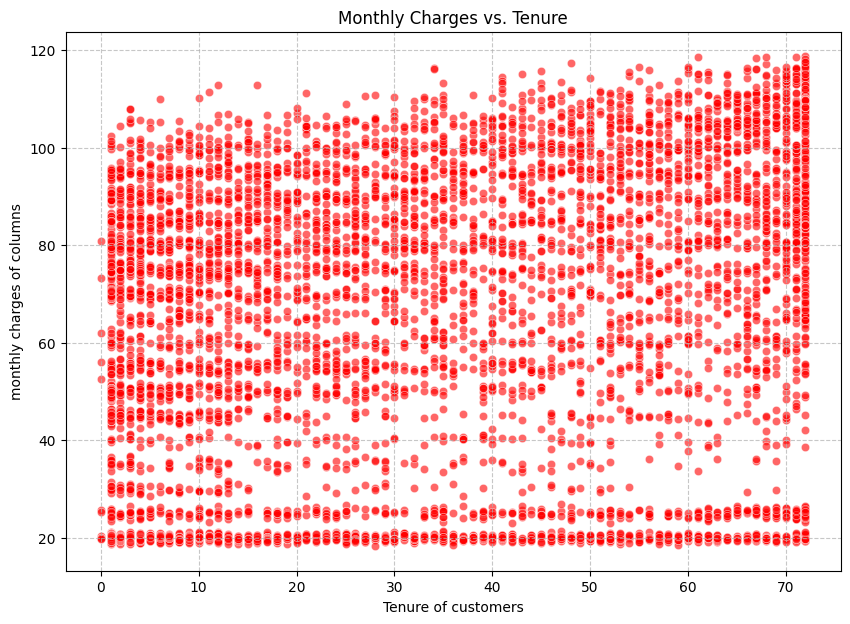

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges', color='red', alpha=0.6)
plt.title('Monthly Charges vs. Tenure')
plt.xlabel('Tenure of customers')
plt.ylabel('monthly charges of columns')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Logistic Regression

In [ ]:
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})
X1 = data[['MonthlyCharges']]
y1 = data['Churn']

print("Converted 'Churn' column head:")
print(data['Churn'].head())
print("\nX1 (MonthlyCharges) head:")
print(X1.head())
print("\ny1 (Churn) head:")
print(y1.head())

Converted 'Churn' column head:
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

X1 (MonthlyCharges) head:
   MonthlyCharges
0           29.85
1           56.95
2           53.85
3           42.30
4           70.70

y1 (Churn) head:
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.35, random_state=42)

print("X1_train shape:", X1_train.shape)
print("X1_test shape:", X1_test.shape)
print("y1_train shape:", y1_train.shape)
print("y1_test shape:", y1_test.shape)

X1_train shape: (4577, 1)
X1_test shape: (2466, 1)
y1_train shape: (4577,)
y1_test shape: (2466,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X1_train, y1_train)

print("Model 1 (Logistic Regression) trained successfully.")

Model 1 (Logistic Regression) trained successfully.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y1_pred = model1.predict(X1_test)

conf_matrix1 = confusion_matrix(y1_test, y1_pred)
print("Confusion Matrix for Model 1:")
print(conf_matrix1)

accuracy1 = accuracy_score(y1_test, y1_pred)
print(f"\nAccuracy Score for Model 1: {accuracy1:.4f}")

Confusion Matrix for Model 1:
[[1797    0]
 [ 669    0]]

Accuracy Score for Model 1: 0.7287


In [ ]:
X2 = data[['tenure', 'MonthlyCharges']]
y2 = data['Churn']

print("X2 (tenure, MonthlyCharges) head:")
print(X2.head())
print("\ny2 (Churn) head:")
print(y2.head())

X2 (tenure, MonthlyCharges) head:
   tenure  MonthlyCharges
0       1           29.85
1      34           56.95
2       2           53.85
3      45           42.30
4       2           70.70

y2 (Churn) head:
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

print("X2_train shape:", X2_train.shape)
print("X2_test shape:", X2_test.shape)
print("y2_train shape:", y2_train.shape)
print("y2_test shape:", y2_test.shape)

X2_train shape: (5634, 2)
X2_test shape: (1409, 2)
y2_train shape: (5634,)
y2_test shape: (1409,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X2_train, y2_train)

print("Model 2 (Logistic Regression) trained successfully.")

Model 2 (Logistic Regression) trained successfully.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y2_pred = model2.predict(X2_test)

conf_matrix2 = confusion_matrix(y2_test, y2_pred)
print("Confusion Matrix for Model 2:")
print(conf_matrix2)

accuracy2 = accuracy_score(y2_test, y2_pred)
print(f"\nAccuracy Score for Model 2: {accuracy2:.4f}")

Confusion Matrix for Model 2:
[[944  92]
 [193 180]]

Accuracy Score for Model 2: 0.7977


In [ ]:
print(f"Accuracy Score for Model 1: {accuracy1:.4f}")
print(f"Accuracy Score for Model 2: {accuracy2:.4f}")

if accuracy2 > accuracy1:
    print("\nModel 2 (using 'tenure' and 'MonthlyCharges') performed better.")
elif accuracy1 > accuracy2:
    print("\nModel 1 (using 'MonthlyCharges') performed better.")
else:
    print("\nBoth models performed equally well.")

Accuracy Score for Model 1: 0.7287
Accuracy Score for Model 2: 0.7977

Model 2 (using 'tenure' and 'MonthlyCharges') performed better.
